# ***Machine Learning Prueba 2 - Analizando los crímenes en la Ciudad de Nueva York***.
### Nombre(s): Thomas Peet, Braulio Águila, Camilo Ramírez
### Generación: G47
### Profesores: Alfonso Tobar - Sebastián Ulloa
### Fecha: 06-10-2022

### *Contexto*
En esta ocasión trabajaremos con datos públicos del departamento de policía de New York.    
El dataset es llamado stop_and_frisk_data y contiene información sobre interrogaciones    
y detenciones realizadas por el departamento de policía de NY en la vía pública. El    
diccionario de atributos se encuentra en el archivo 2009 SQF File Spec.xls.    
Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como    
conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer    
notar que los datos que estamos utilizando son un muestreo del de la cantidad de registros    
reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de    
entrenamiento y procesamiento que requiere el volumen de datos reales. 

### *Objetivos*
Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:  

1. Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos    
perdidos y presente su esquema de recodificación. Tenga presente que lo que    
observe en el análisis exploratorio debe guiar su proceso de ingeniería de atributos,    
por lo que se le recomienda que piense en aspectos de las variables involucradas     
que puedan afectar el proceso mencionado.

2. Reporte la probabilidad de que un individuo sea arrestado en uno de los cinco  
barrios, condicional al género y a la raza. Concluya, ¿qué implicancias éticas tienen  
algunas conclusiones de lo que observa?.

3. Entregue un modelo predictivo que prediga efectivamente si un determinado  
procedimiento concluirá en un arresto o no. Para ello, guíate por los siguientes  
lineamientos:  
    - Entrene por lo menos 3 modelos que sean capaces de predecir si se  
producirá un arresto o no. Una vez que encuentre un modelo satisfactorio,  
reporte al menos dos métricas de desempeño.  
    - Refine aquellos atributos relevantes con alguna estrategia que crea  
conveniente y reporte por lo menos 5 atributos relevantes para realizar la  
predicción.

4. Genere al menos cinco modelos predictivos que permitan determinar si el  
procedimiento policial concluirá en alguna acción violenta.  
○ Para ello, debe generar un nuevo atributo como vector objetivo que indique  
cuándo hubo violencia o no. Éste debe ser creado a partir de atributos  
existentes que indiquen el tipo de violencia.
  
5. Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que  
el modelo serializado debe ser posterior al fit, para poder ejecutar predict en los  
nuevos datos

>>>#### Tipo de problema a resolver:
- De acuerdo con el enunciado y una revisión preliminar de los datos entregados, ambas problemáticas planteadas,  
el hecho de que ocurra o no un arresto, y de que un procedimiento policial es o no violento, corresponden a   
problemas de **clasificación**, ya que ambas variables objetivos son discretas.

>>>#### Tipo de métricas a implementar:
- Las métricas que se utilizarán para la división de muestras corresponden a :
- Tipo de preprocesamiento: 

>>>#### Modelos (5) con gridsearch e hiperparamétros tentativos/definitivos:
- Modelo 1:
- Modelo 2:
- Modelo 3:
- Modelo 4:
- Modelo 5:

>>>#### Comportamiento de variables objetivo (recodificados):
- Variable objetivo 1: procedimiento policial en el que ocurre o no un arresto ("arstmade")
- Variable objetivo 2: procedimiento policial 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
#from feature engine drop features ----> sacar features para el pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn import set_config
set_config(display='diagram')

from pathlib import Path
from pandas_profiling import ProfileReport

import geopandas as gpd
import contextily as cx
#import shapely
#import folium 
import pyproj
import helpers as hp
import preproc_nyc_sqf_V2 as preproc
import contextily as cx
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import FunctionTransformer
import sys
sys.path.append('..')

from utils import CreateSuitableDataframeTransformer
from utils import OrdinalEncoderFixedTransformer
from utils import DropRowsTransformer
# from utils import CriterioExperto
from utils import KerasCustomClassifier
import utils

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.ensemble import StackingClassifier


from utils import PrintVars
from sklearn.preprocessing import FunctionTransformer


## ***Dataset interrogaciones/detenciones Policía de Nueva York - 2009***:

## Preprocesamiento del dataframe

---
### Definición de los datasets para los 2 problemas de clasificación

* Se eliminan los datos sin xcoord o ycoord
* Se eliminan los registros de detenidos menores de 18 años

In [3]:
df2009 = pd.read_csv('2009_1perc.csv', index_col=0)

drt = DropRowsTransformer()
df2009_nonull = drt.transform(df2009)

# Explicar que esta función segmenta el dataframe en 2 problemas: clasificación de arrestos y clasificación de arrestos con violencia.
# Exploración variable objetivo 2 ("violencia física en arresto") --- Necesita ser recodificada
# El mismo dataframe aplicando los criterios de descartar datos sin xcoord/ycoord y registros de menores de 18 años
x_1, y_1, x_2, y_2 = utils.split_features_target(df2009_nonull)
x_1.shape, y_1.shape, x_2.shape, y_2.shape

((4499, 111), (4499,), (4499, 103), (4499,))

>>>#### Exploración variable objetivo 1 ("arstmade")

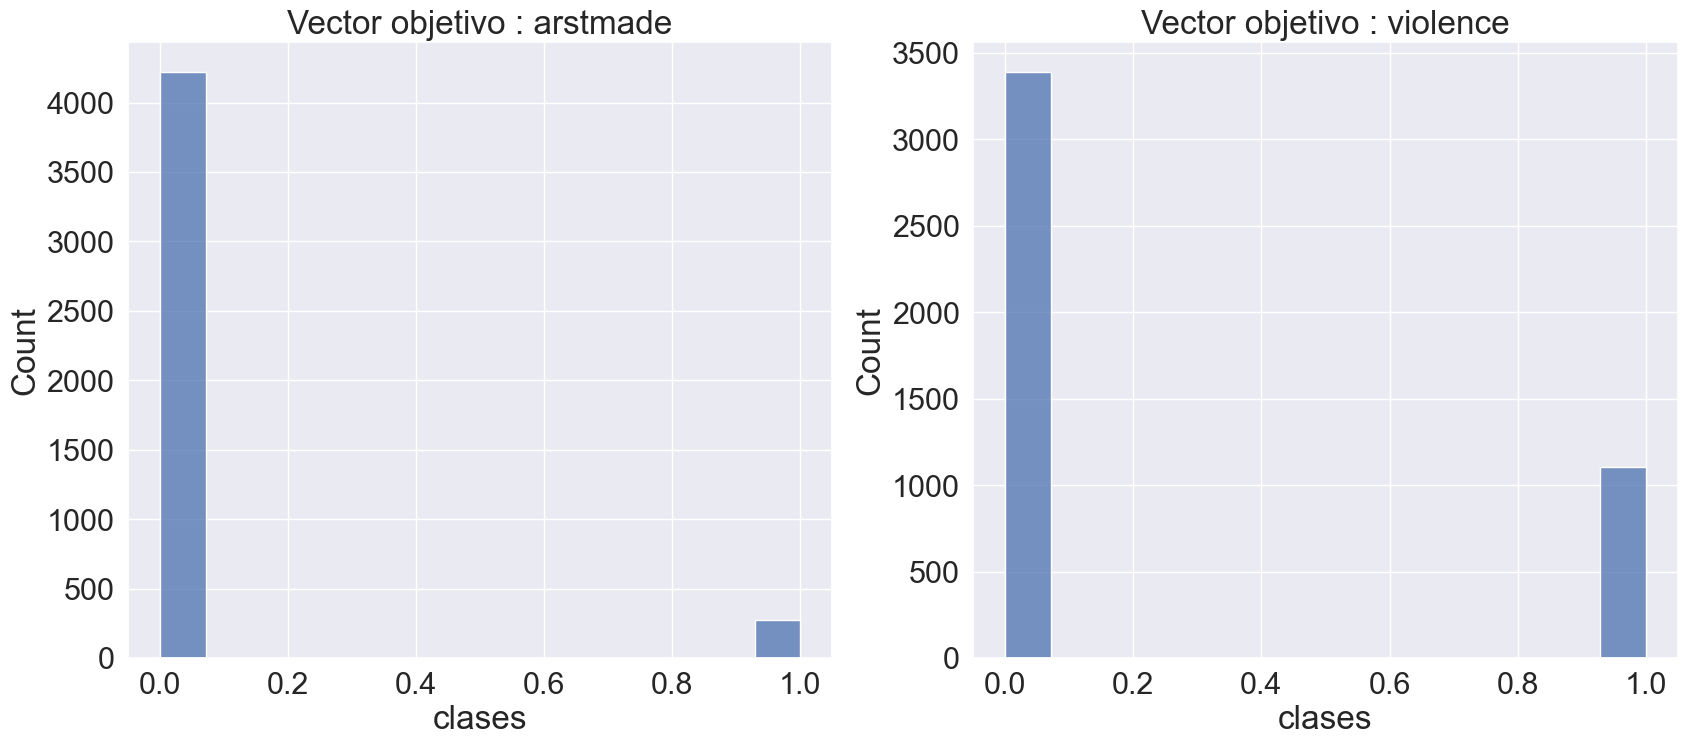

In [4]:
#Visualización de el vector objetivo:
sns.set(font_scale=2)
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.histplot(y_1); # Categoría uno muchos menos casos que categoría 0.
plt.title("Vector objetivo : arstmade")
plt.xlabel("clases");
plt.subplot(1,2,2)
sns.histplot(y_2); # Categoría uno muchos menos casos que categoría 0.
plt.title("Vector objetivo : violence")
plt.xlabel("clases");

In [5]:
#Conteo de nulos
#proc_df.info(verbose=True, show_counts=True,memory_usage=False)

In [6]:
# utils.cat_num_rate_analysis(df2009_nonull);

--- 
### Analisis de correlación para feature selection

In [7]:
# from utils import PrintVars
# def transform_pipeline():
#     pipe = Imb_Pipeline(steps=[
#         # ('csd', CreateSuitableDataframeTransformer()),
#         # ('cat_imp', CategoricalImputer(imputation_method='frequent')),
#         # ('num_imp', MeanMedianImputer(imputation_method='mean')),
#         # ('oe', OrdinalEncoderFixedTransformer(encoding_method='ordered'))

#         ('csd', CreateSuitableDataframeTransformer()),
#         ('cat_imp', CategoricalImputer(imputation_method='frequent')),
#         ('num_imp', MeanMedianImputer(imputation_method='mean')),
#         ('oe', OrdinalEncoderFixedTransformer(encoding_method='ordered')),# aqui estoy pasando info desde el proceso csd (que son las columnas que seleccionamos como categoricas) para encodear.
#         ('smote', SMOTE(sampling_strategy='auto',random_state=42)),
#         ('sc', SklearnTransformerWrapper(StandardScaler())),
#     ])
#     return pipe

# pipex = transform_pipeline()
# df2009_nonull_tr = pipex.fit_transform(df2009_nonull.drop(columns = 'arstmade'), y_1)
# utils.get_top_correlations_blog(df2009_nonull_tr, threshold=0.6)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# display(df2009_nonull_tr.isnull().sum().sum())

--- 
### Análisis y gráficos de probabilidades condicionales

In [8]:
# pd.set_option('display.max_rows', None)
df_probs = df2009_nonull.copy()
var_pf = df_probs.columns[np.where([i[0:2]=='pf' for i in df_probs.columns.tolist()])].tolist()
serie = pd.Series([int(np.isin(["Y"], df_probs[var_pf].iloc[i].values.tolist())[0]) for i in range(0, len(df_probs[var_pf]))], index = df_probs.index)
# df_probs['violence'] = 
df_probs['violence'] = serie

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'violence')

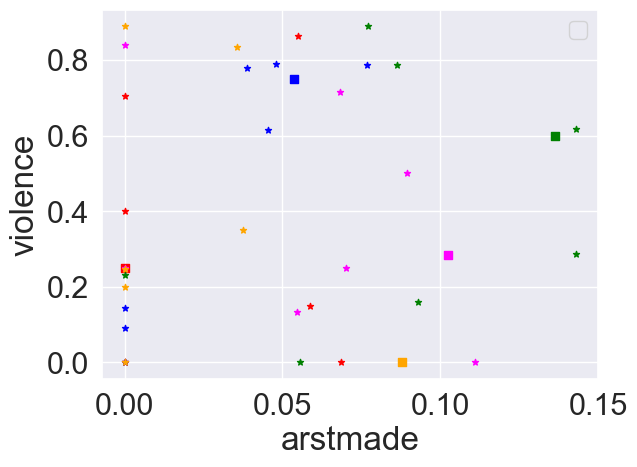

In [9]:

probs = pd.DataFrame(df_probs.groupby(['city', 'race', 'sex']).arstmade.value_counts
(normalize=True))
counts = pd.DataFrame(df_probs.groupby(['city', 'race', 'sex']).arstmade.value_counts
(normalize=False))

probs_v = pd.DataFrame(df_probs.groupby(['city', 'race', 'sex']).violence.value_counts
(normalize=True))
counts_v = pd.DataFrame(df_probs.groupby(['city', 'race', 'sex']).violence.value_counts
(normalize=False))

# Sex: F, M, Z
# Race: A, B, I, P, Q, U, W, X, Z
# City: BRONX, QUEENS, STATEN ISLAND, MANHATTAN, BROOKLYN

zprobs = list(zip(probs['arstmade'], probs_v['violence'], probs.index))
for x, y, i in zprobs:
    # display(i)
    if i[3] == 'N':
        if i[2] == 'M':
            if i[0] == 'BRONX':
                c = 'red'
            elif i[0] == 'BROOKLYN':
                c = 'blue'
            elif i[0] == 'MANHATTAN':
                c = 'green'
            elif i[0] == 'QUEENS':
                c = 'magenta'
            else:
                c = 'orange'
            
            if i[1] == 'W':
                m = 's'
                s = 40
            else:
                m = '*'
                s = 20
            # elif 

        
            plt.scatter(1-x,1-y, c= c, marker=m, s=s)
plt.legend(loc='best', fontsize=16)
plt.xlabel('arstmade')
plt.ylabel('violence')


# print(probs.query("race == 'B' & sex == 'M' "))
# print(probs.query("race == 'W' & sex == 'M' "))
# print('--------------')
# print(probs_v.query("race == 'B' & sex == 'M' "))
# print(probs_v.query("race == 'W' & sex == 'M' "))

---
### Gráficos georeferenciados de arrestos y violencia

In [10]:
'''
gdf = gpd.GeoDataFrame(df2009_nonull, geometry=gpd.points_from_xy(df2009_nonull.xcoord, df2009_nonull.ycoord))

df = gpd.read_file(gpd.datasets.get_path("nybb"))
df_wm = df.to_crs(epsg=3857)

ax = df.plot(figsize=(15,10), alpha=0.5, edgecolor = "k")
cx.add_basemap(ax,crs=df.crs, zoom =11, source=cx.providers.Stamen.TonerLite)
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)
gdf.plot(ax=ax, color= "red", edgecolor = "black", markersize = 4)


#Incorporar al código de arriba para poder plotear variable objetivo:
# fig,ax = plt.subplots(1, 1) #plt.figure(figsize=(10,8))
# fig.set_size_inches(25, 25)
# df2009map[df2009map.arstmade == "N"].plot(color="red", ax=ax, markersize = 1)
# df2009map[df2009map.arstmade == "Y"].plot(ax=ax,  markersize = 12)
# plt.show()
# función transformar x,y to lon, lat:
def xy_to_latlon(x,y):
    source_crs = 'epsg:2263' # Coordinate system of the file
    target_crs = 'epsg:4326' # Global lat-lon coordinate system
    polar_to_latlon = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)
    lat, lon = polar_to_latlon.transform(x,y)
    return lon, lat
df_shape_ny = gpd.read_file(gpd.datasets.get_path("nybb")).to_crs(epsg=3857)
df_shape_ny

import folium
m = folium.Map(location=[40.7127837, -74.0059413],control_scale=True, zoom_start=10,tiles='CartoDB positron')
# base_map.add_to(f)
for _, r in df_shape_ny.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    # folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(m)
m
geometrias = [list(x.exterior.coords) for x in df_shape_ny.geometry[0]] 
from scipy.spatial import ConvexHull
from folium import plugins
import folium

f = folium.Figure(width=700, height=400)    
base_map = folium.Map(location=[40.7127837, -74.0059413],control_scale=True, zoom_start=10,tiles='CartoDB positron')
base_map.add_to(f)

# folium.GeoJson(data=df_shape_ny["geometry"]).add_to(base_map)

colors = ['orange','yellow','red','blue','green']

for _, r in df_shape_ny.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry'])
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,  style_function=lambda x: {'fillColor': 'orange'})
    # folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(base_map)


# for point,color in zip(df_shape_ny["geometry"],colors):
# 	# if color == 'orange' or True:
# 		# lats, longs = xy_to_latlon([i[0] for i in point],[i[1] for i in point], polar_to_latlon)
# 		# positions = [(y, x) for x, y in zip(lats, longs)]
# 		# points_rev = [(y,x) for x,y in point]
# 		# points_rev = [points_rev[i] for i in ConvexHull(points_rev).vertices]
# 		# if color == 'orange':
# 			# display(positions)
# 	# sim_geo = gpd.GeoSeries(point).simplify(tolerance=0.001)
# 	# geo_j = sim_geo.to_json()
# 	# rrr = gpd.GeoSeries(point).simplify(tolerance=0.001).to_json()
# 	folium.GeoJson(data=pd.Series(point),  style_function=lambda feature: {
#             'fillColor': color,
#             'fillOpacity': 0.8,
#         }).add_to(base_map)
	# geo_j = folium.GeoJson(data=geo_j,  style_function=lambda x: {'fillColor': 'orange'})
	# folium.Popup(r['BoroName']).add_to(geo_j)
	# geo_j.add_to(base_map)

	# plugins.PolyLineOffset(locations=point, color='blue', fill=True, fill_color=color, fill_opacity=0.5, smooth_factor=.1).add_to(base_map)

# lats, longs = xy_to_latlon(df2009.xcoord.to_list(), df2009.ycoord.to_list(), xy_to_latlon)
# for lat, lon, i in zip(lats, longs, df2009.arstmade):
#     color = 'blue' if i == 'Y' else '#FF000030'
#     size = '20' if i == 'Y' else '10'
#     border = 'none' if i == 'Y' else 'none'
#     folium.Marker(location=[str(lon), str(lat)], icon=folium.DivIcon(html=f"<span style='font-size:{size}px;color:{color};border:{border}'>&#9670;</span>"),popup=i).add_to(base_map)
base_map
#otra opción de crear mapa con folium:
import folium
def generateBaseMap(loc, zoom=11, tiles='OpenStreetMap', crs='ESPG3857'):
    return folium.Map(location=loc,
                   #control_scale=True, 
                   zoom_start=zoom,
                   #tiles=tiles)
    )
base_map = generateBaseMap([40.7127837, -74.0059413])


marker = list(range(len(df2009.xcoord)))
counter = 0
tooltip = "Click Here For More Info"
icon = folium.features.CustomIcon('https://cdn-icons-png.flaticon.com/128/7500/7500224.png', icon_size=(40, 40))

for x,y in zip(df2009.xcoord, df2009.ycoord):
    lon, lat = xy_to_latlon(x,y)
    marker[counter] = folium.Marker(icon=icon,
    #     #location=[40.7127837, -74.0059413],
    location=[lon, lat],
    #     #popup="<stong>Allianz Arena</stong>",
    #     #tooltip=tooltip
    )
    marker[counter].add_to(base_map)
    #print(f"latitud {lat} y longitud {lon}")
    if counter>5 : 
        break
    counter += 1
base_map
'''

'\ngdf = gpd.GeoDataFrame(df2009_nonull, geometry=gpd.points_from_xy(df2009_nonull.xcoord, df2009_nonull.ycoord))\n\ndf = gpd.read_file(gpd.datasets.get_path("nybb"))\ndf_wm = df.to_crs(epsg=3857)\n\nax = df.plot(figsize=(15,10), alpha=0.5, edgecolor = "k")\ncx.add_basemap(ax,crs=df.crs, zoom =11, source=cx.providers.Stamen.TonerLite)\n#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)\ngdf.plot(ax=ax, color= "red", edgecolor = "black", markersize = 4)\n\n\n#Incorporar al código de arriba para poder plotear variable objetivo:\n# fig,ax = plt.subplots(1, 1) #plt.figure(figsize=(10,8))\n# fig.set_size_inches(25, 25)\n# df2009map[df2009map.arstmade == "N"].plot(color="red", ax=ax, markersize = 1)\n# df2009map[df2009map.arstmade == "Y"].plot(ax=ax,  markersize = 12)\n# plt.show()\n# función transformar x,y to lon, lat:\ndef xy_to_latlon(x,y):\n    source_crs = \'epsg:2263\' # Coordinate system of the file\n    target_crs = \'epsg:4326\' # Global lat-lon coordinate system\n    pola

---
### Definición de columnas eliminadas en base a "Criterio Expertos"

In [11]:
# Considerar variables relevantes para modelos de procedimiento que concluye en arresto y/o procedimiento que concluye en situación violenta:
# redefinir variable "others" (esta mál escrita con respecto a la planilla)

var_eliminar_pf = ["pf_baton", "pf_hcuff", "pf_pepsp", "pf_other", "pf_ptwep", "pf_drwep", "pf_wall", "pf_hands", "pf_grnd"] # 9 variables eliminadas 

var_eliminar_por_corr = ["searched", "offunif", "offverb", "frisked", "rf_bulg"]

var_eliminar_others = ["ac_rept", "ac_inves", "ac_proxm", "cs_casng", "cs_lkout", "explnstp","sumissue", "offunif", "officrid", "frisked", "cs_cloth", "offverb", "rf_furt", "ac_other", "rf_bulg", "cs_furtv", "recstat", "cs_bulge", "cs_other", "trhsloc", "build", "beat", "post","rf_attir", "cs_objcs","eyecolor", "haircolr", "sector" ]


In [12]:
# from utils import PrintVars
# def transform_pipeline():
#     pipe = Imb_Pipeline(steps=[
#         # ('csd', CreateSuitableDataframeTransformer()),
#         # ('cat_imp', CategoricalImputer(imputation_method='frequent')),
#         # ('num_imp', MeanMedianImputer(imputation_method='mean')),
#         # ('oe', OrdinalEncoderFixedTransformer(encoding_method='ordered'))
#         ('ce', CriterioExperto(columns=var_eliminar_others + var_eliminar_pf)),
#         ('csd', CreateSuitableDataframeTransformer()),
#         ('cat_imp', CategoricalImputer(imputation_method='frequent')),
#         ('num_imp', MeanMedianImputer(imputation_method='mean')),
#         ('oe', OrdinalEncoderFixedTransformer(encoding_method='ordered')),# aqui estoy pasando info desde el proceso csd (que son las columnas que seleccionamos como categoricas) para encodear.
#         ('smote', SMOTE(sampling_strategy='auto',random_state=42)),
#         ('sc', SklearnTransformerWrapper(StandardScaler())),
#     ])
#     return pipe

# pipex = transform_pipeline()
# df2009_nonull_tr = pipex.fit_transform(df2009_nonull.drop(columns = 'arstmade'), y_1)
# # utils.get_top_correlations_blog(df2009_nonull_tr, threshold=0.6)

# # pd.set_option('display.max_rows', None)
# # pd.set_option('display.max_columns', None)

# display(df2009_nonull_tr.isnull().sum().sum())

---
### Definición de Clasificadores Base

In [13]:
gnb     = GaussianNB() # 59 seg train
knc     = KNeighborsClassifier()
svc     = SVC(random_state=42, probability=True)
gbc     = GradientBoostingClassifier(random_state=42)
# funciona particularmente bien stackeando xgboost
lr      = LogisticRegression(random_state=42, C=0.01) # gnb
rfc     = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10) # 61 train

# metaestimator stacking
sc_1 = StackingClassifier(estimators=[("lr", lr), ("rfc", rfc)], final_estimator=gbc, cv=5)
# En este caso se eligieron estimadores de naturaleza distinta en los estimadores. En el final estimator se selecciono un gradient boosting.

# metaestimator voting
vc_1 = VotingClassifier([("lr", lr), ("knc", knc), ("gbc", gbc)], voting="hard", n_jobs=-1)
# Se eligio un número impar de modelos para que siempre exista mayoría. 

# metaestimator boosting
bc_1 = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1, n_estimators=5), random_state=42, n_estimators=100, learning_rate=1)

nn_arch = {
    'input_layer'       : ('input_dense', 32, 'relu'),
    'drop_1'            : ('dropout', .2),
    'output_layer'      : ('dense', 1, 'sigmoid')
}

kcc = KerasCustomClassifier(    
                                nn_arch, 
                                loss='binary_crossentropy',
                                optimizer='Adam',
                                metrics='accuracy',
                                net_name='twitter_keras_net',
                                epochs=10
                            )
#Se utiliza función entregada para limpieza preliminar de la data, se obtiene un df nuevo procesado y dos listas:
# proc_df #este nuevo dataframe, estas constituido de 69 variables categóricas y 2 númericas sintéticas ("meters", "month")

---
### Definición del main pipeline

In [16]:

# Solución para usar SMOTE en gridsearch con muchos pasos: https://stackoverflow.com/questions/65652054/not-able-to-feed-the-combined-smote-randomundersampler-pipeline-into-the-main


def main_pipeline(estimator, type='accuracy', problema='arstmade'):
    if problema == 'arstmade':
        if type=='accuracy':
            return Imb_Pipeline(steps=[
                ('ce', FunctionTransformer(utils.criterio_experto, kw_args={'columns': var_eliminar_por_corr + var_eliminar_pf})),
                ('csd', CreateSuitableDataframeTransformer()),
                ('cat_imp', CategoricalImputer(imputation_method='frequent')),
                ('oe', OrdinalEncoderFixedTransformer(encoding_method='ordered')),# aqui estoy pasando info desde el proceso csd (que son las columnas que seleccionamos como categoricas) para encodear.
                ('num_imp', MeanMedianImputer(imputation_method='median')),
                ('sc', SklearnTransformerWrapper(StandardScaler())),
                ('model', estimator)
            ])
        
        return Imb_Pipeline(steps=[
            ('csd', CreateSuitableDataframeTransformer()),
            ('cat_imp', CategoricalImputer(imputation_method='frequent')),
            ('oe', OrdinalEncoderFixedTransformer(encoding_method='ordered')),
            ('num_imp', MeanMedianImputer(imputation_method='median')),
            ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
            ('sc', SklearnTransformerWrapper(StandardScaler())),
            ('model', estimator)
        ])
    return Imb_Pipeline(steps=[
        ('ce', FunctionTransformer(utils.criterio_experto, kw_args={'columns': var_eliminar_por_corr + var_eliminar_pf})),
        ('csd', CreateSuitableDataframeTransformer()),
        ('cat_imp', CategoricalImputer(imputation_method='frequent')),
        ('oe', OrdinalEncoderFixedTransformer(encoding_method='ordered')),
        ('num_imp', MeanMedianImputer(imputation_method='median')),
        ('sc', SklearnTransformerWrapper(StandardScaler())),
        ('model', estimator)
    ])

def gridsearch_train_and_save(pipe,x,y, params, scoring='accuracy', file_name='file.pickle'):
    search = GridSearchCV(pipe, params, cv=5, scoring=scoring, n_jobs=4, error_score='raise', verbose=10)
    search.fit(x_1, y_1)

    utils.save_bytes_variable({'best_params': search.best_params_, 'best_score': search.best_score_, 'pipe': pd.DataFrame(search.cv_results_), 'params': params}, file_name)
    return search

---
### Optimización del sub-pipeline de preprocessing

In [ ]:
l1 = list(set(var_eliminar_por_corr + var_eliminar_others + var_eliminar_pf))
l2 = list(set(var_eliminar_por_corr + var_eliminar_pf))
l3 = list(set(var_eliminar_por_corr + var_eliminar_others))
params = {
        'ce': [     
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':l1}),
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':l2}),
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':l3}),
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':[]}),        
                ],
        # 'smote': [SMOTE(sampling_strategy='auto',random_state=42), None],
        'cat_imp__imputation_method': ['frequent', 'missing'],
        'num_imp__imputation_method': ['median', 'mean'],
        'oe__encoding_method': ['ordered', 'arbitrary']
}

pipe1 = main_pipeline(rfc)
pipe2 = main_pipeline(rfc)

search_acc = gridsearch_train_and_save(pipe1,x_1,y_1, params, scoring='accuracy', file_name='gridsearch_preprocessing_crimenes_accuracy.pickle')
search_rec = gridsearch_train_and_save(pipe2,x_1,y_1, params, scoring='recall', file_name='gridsearch_preprocessing_crimenes_recall.pickle')

In [ ]:
search_acc.best_params_, search_acc.best_score_

In [ ]:
search_rec.best_params_, search_rec.best_score_

---
# Clasificación de Arstmade

---
### GridSearch de Modelo 1: Stacking

In [ ]:
pipe_stacking = main_pipeline(sc_1)

params_stacking = {
    'model__final_estimator__n_estimators': [50, 100, 500],
    'model__final_estimator__max_depth': [5, 10, 50]
}

search_stacking = gridsearch_train_and_save(pipe_stacking,x_1,y_1, params_stacking, scoring='accuracy', file_name='gridsearch_stacking_crimenes_accuracy.pickle')


---
### GridSearch de Modelo 2: Voting

In [ ]:
pipe_voting = main_pipeline(vc_1)

params_voting = {
                    'model__voting': ['hard','soft']
                }

search_voting = gridsearch_train_and_save(pipe_voting,x_1,y_1, params_voting, scoring='accuracy', file_name='gridsearch_voting_crimenes_accuracy.pickle')

---
### GridSearch de Modelo 3: GBoost

In [ ]:
pipe_gboost = main_pipeline(gbc)

params_gboost = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1],
    'model__max_depth': [1, 2, 3, 4, 5]
}

search_gboost = gridsearch_train_and_save(
    pipe_gboost, x_1, y_1, params_gboost, scoring='accuracy', file_name='gridsearch_gboost_crimenes_accuracy.pickle')


---
### GridSearch de Modelo 4: Adaboost

In [ ]:
pipe_adaboost = main_pipeline(bc_1)

params_adaboost = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1]
}

search_adaboost = gridsearch_train_and_save(
    pipe_adaboost, x_1, y_1, params_adaboost, scoring='accuracy', file_name='gridsearch_adaboost_crimenes_accuracy.pickle')


---
### GridSearch de Modelo 5: Red Neuronal

In [ ]:
pipe_nn = main_pipeline(kcc)

nn_arch_1 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .2),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_2 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .2),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_3 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .1),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_4 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .1),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_5 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .4),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_6 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .4),
    'output_layer': ('dense', 1, 'sigmoid')
}

params_nn = {
    'model__epochs': [5, 10, 20],
    'model__nn_arch': [nn_arch_1, nn_arch_2, nn_arch_3, nn_arch_4, nn_arch_5, nn_arch_6],
}


search_nn = gridsearch_train_and_save(pipe_nn, x_1,y_1, params_nn, scoring='accuracy', file_name='gridsearch_nn_crimenes_accuracy.pickle')


---
# Optimización problema de clasificación 'Arstmade' sobre métrica Recall

---
### GridSearch de Modelo 1: Stacking

In [ ]:
pipe_stacking_r = main_pipeline(sc_1, type='recall')

params_stacking_r = {
    'model__final_estimator__n_estimators': [50, 100, 500],
    'model__final_estimator__max_depth': [5, 10, 50]
}

search_stacking_r = gridsearch_train_and_save(pipe_stacking_r,x_1,y_1, params_stacking_r, scoring='recall', file_name='gridsearch_stacking_crimenes_recall.pickle')


---
### GridSearch de Modelo 2: Voting

In [ ]:
pipe_voting_r = main_pipeline(vc_1, type='recall')

params_voting_r = {
                    'model__voting': ['hard','soft']
                }

search_voting_r = gridsearch_train_and_save(pipe_voting_r,x_1,y_1, params_voting_r, scoring='recall', file_name='gridsearch_voting_crimenes_recall.pickle')

---
### GridSearch de Modelo 3: GBoost

In [ ]:
pipe_gboost_r = main_pipeline(gbc, type='recall')

params_gboost_r = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1],
    'model__max_depth': [1, 2, 3, 4, 5]
}

search_gboost_r = gridsearch_train_and_save(
    pipe_gboost_r, x_1, y_1, params_gboost_r, scoring='recall', file_name='gridsearch_gboost_crimenes_recall.pickle')


---
### GridSearch de Modelo 4: Adaboost

In [ ]:
pipe_adaboost_r = main_pipeline(bc_1, type='recall')

params_adaboost_r = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1]
}

search_adaboost_r = gridsearch_train_and_save(
    pipe_adaboost_r, x_1, y_1, params_adaboost_r, scoring='recall', file_name='gridsearch_adaboost_crimenes_recall.pickle')


---
### GridSearch de Modelo 5: Red Neuronal

In [ ]:
pipe_nn_r = main_pipeline(kcc, type='recall')

nn_arch_1 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .2),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_2 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .2),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_3 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .1),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_4 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .1),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_5 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .4),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_6 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .4),
    'output_layer': ('dense', 1, 'sigmoid')
}

params_nn_r = {
    'model__epochs': [5, 10, 20],
    'model__nn_arch': [nn_arch_1, nn_arch_2, nn_arch_3, nn_arch_4, nn_arch_5, nn_arch_6],
}


search_nn_r = gridsearch_train_and_save(pipe_nn_r, x_1,y_1, params_nn_r, scoring='recall', file_name='gridsearch_nn_crimenes_recall.pickle')


---
# Clasificación de Violence

---
### Optimización del sub-pipeline de preprocessing del problema de clasificación del target 'violence'

In [20]:
l1 = list(set(var_eliminar_por_corr + var_eliminar_others + var_eliminar_pf))
l2 = list(set(var_eliminar_por_corr + var_eliminar_pf))
l3 = list(set(var_eliminar_por_corr + var_eliminar_others))
params = {
        'ce': [     
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':l1}),
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':l2}),
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':l3}),
                FunctionTransformer(utils.criterio_experto, kw_args={'columns':[]}),        
                ],
        'smote': [SMOTE(sampling_strategy='auto',random_state=42), None],
        'cat_imp__imputation_method': ['frequent', 'missing'],
        'num_imp__imputation_method': ['median', 'mean'],
        'oe__encoding_method': ['ordered', 'arbitrary']
}

pipe1_v = main_pipeline(rfc, problema='violence')
pipe2_v = main_pipeline(rfc, problema='violence')

search_acc_v = gridsearch_train_and_save(pipe1_v, x_2, y_2, params, scoring='accuracy', file_name='gridsearch_preprocessing_crimenes_violence_accuracy.pickle')

Fitting 5 folds for each of 64 candidates, totalling 320 fits


---
### GridSearch de Modelo 1: Stacking

In [ ]:
pipe_stacking_v = main_pipeline(sc_1, problema='violence')

params_stacking_v = {
    'model__final_estimator__n_estimators': [50, 100, 500],
    'model__final_estimator__max_depth': [5, 10, 50]
}

search_stacking_v = gridsearch_train_and_save(
    pipe_stacking_v,x_2, y_2, params_stacking_v, scoring='accuracy', file_name='gridsearch_stacking_crimenes_violence_accuracy.pickle')


---
### GridSearch de Modelo 2: Voting

In [ ]:
pipe_voting_v = main_pipeline(vc_1, problema='violence')

params_voting_v = {
                    'model__voting': ['hard','soft']
                }

search_voting_v = gridsearch_train_and_save(
    pipe_voting_v, x_2, y_2, params_voting_v, scoring='accuracy', file_name='gridsearch_voting_crimenes_violence_accuracy.pickle')


---
### GridSearch de Modelo 3: GBoost

In [ ]:
pipe_gboost_v = main_pipeline(gbc, problema='violence')

params_gboost_v = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1],
    'model__max_depth': [1, 2, 3, 4, 5]
}

search_gboost_v = gridsearch_train_and_save(pipe_gboost_v, x_2, y_2, params_gboost_v, scoring='accuracy', file_name='gridsearch_gboost_crimenes_violence_accuracy.pickle')


---
### GridSearch de Modelo 4: Adaboost

In [ ]:
pipe_adaboost_v = main_pipeline(bc_1, problema='violence')

params_adaboost_v = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1]
}

search_adaboost_v = gridsearch_train_and_save(pipe_adaboost_v, x_2, y_2, params_adaboost_v,
                                            scoring='accuracy', file_name='gridsearch_adaboost_crimenes_violence_accuracy.pickle')


---
### GridSearch de Modelo 5: Red Neuronal

In [ ]:
pipe_nn_v = main_pipeline(kcc, problema='violence')

nn_arch_1 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .2),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_2 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .2),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_3 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .1),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_4 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .1),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_5 = {
    'input_layer': ('input_dense', 32, 'relu'),
    'drop_1': ('dropout', .4),
    'output_layer': ('dense', 1, 'sigmoid')
}

nn_arch_6 = {
    'input_layer': ('input_dense', 16, 'relu'),
    'drop_1': ('dropout', .4),
    'output_layer': ('dense', 1, 'sigmoid')
}

params_nn_v = {
    'model__epochs': [5, 10, 20],
    'model__nn_arch': [nn_arch_1, nn_arch_2, nn_arch_3, nn_arch_4, nn_arch_5, nn_arch_6],
}


search_nn_v = gridsearch_train_and_save(
    pipe_nn_v, x_2, y_2, params_nn_v, scoring='accuracy', file_name='gridsearch_nn_crimenes_violence_accuracy.pickle')
